# Clasificación binaria

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://cdn.pixabay.com/photo/2017/04/08/11/07/nerve-cell-2213009_960_720.jpg" width="400px" height="125px" />

> Lo que veremos en esta clase son aspectos básicos de lo que se conoce técnicamente con muchos nombres sofisticados: aprendizaje de máquina (machine learning), clasificación con redes neuronales (neural networks), entre otros.

**Referencia**
- https://es.coursera.org/learn/neural-networks-deep-learning
___

## 0. Motivación
Muchas aplicaciones de ingeniería se derivan de construir **modelos** para:
- predecir (clima, proyección de producción, toma de decisiones),
- diseñar (máquinas eléctricas, construcciones),
- entre otros.

Hasta hace unos quince años, la construcción de dichos modelos se hacía mayoritariamente con base en leyes basadas en una fuerte evidencia de la naturaleza (leyes de Newton, ecuaciones de Maxwell, leyes de la termodinámica, entre otras).

Sin embargo, en los últimos años, la gran cantidad de información disponible junto con el avance tecnológico en capacidad de procesamiento han llevado a que se construyan modelos con base en simplemente datos.

Ejemplos:
- Modelado de tráfico (waze/google maps).
- Modelos sociales (publicidad, diseño de estrategias de mercadeo).
- Modelos de... ¿personalidad?

Si lo anterior no les resulta sorprendente, los invito a que saquen veinte minutos y lean la siguiente [entrevista](http://www.theclinic.cl/2017/01/19/martin-hilbert-experto-redes-digitales-obama-trump-usaron-big-data-lavar-cerebros/).

Bueno, todo lo anterior es el poderoso alcance que tienen las tecnologías de la información. Hoy veremos un abrebocas: **construir un modelo de clasificación binaria con base en datos únicamente**.

## 1. Formulación del problema

### 1.1 Idea básica

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="200px" height="70px" />

Presentamos la idea básica de clasificación binaria mediante un ejemplo.

Tenemos como *entrada* una imagen digital y como *salida* una etiqueta que identifica a esta imagen como el logo del ITESO (en cuyo caso la etiqueta toma el valor de uno '1') o no (en cuyo caso la etiqueta toma el valor de cero '0').

A la salida la denotaremos $y$.

**¿Cómo guarda las imágenes un computador?** Código de colores RGB.

<font color = red>
$$R=\left[\begin{array}{cccc}255 & 124 & \dots & 45\\ 235 & 224 & \dots & 135\\ \vdots & \vdots & & \vdots\\ 23 & 12 & \dots & 242\end{array}\right]$$
</font>
<font color = green>
$$G=\left[\begin{array}{cccc}255 & 154 & \dots & 42\\ 215 & 24 & \dots & 145\\ \vdots & \vdots & & \vdots\\ 0 & 112 & \dots & 232\end{array}\right]$$
</font>
<font color = blue>
$$B=\left[\begin{array}{cccc}255 & 231 & \dots & 145\\ 144 & 234 & \dots & 35\\ \vdots & \vdots & & \vdots\\ 5 & 52 & \dots & 42\end{array}\right]$$
</font>

Cada matriz tiene tamaño correspondiente con los pixeles de la imagen. Si la imagen se de $64px\times 64px$, cada matriz será de $64\times 64$.

**¿Cómo podemos convertir entonces una imagen en una entrada?** Ponemos cada valor de cada matriz en un vector de características $\boldsymbol{x}$:

$$\boldsymbol{x}=\left[\begin{array}{ccc} \text{vec}R & \text{vec}G & \text{vec}B \end{array}\right]^T=\left[\begin{array}{ccccccccc} 255 & 124 & \dots & 255 & 154 & \dots & 255 & 231 & \dots \end{array}\right]^T$$

Entonces el problema de clasificación se puede resumir como dado un vector de entrada $\boldsymbol{x}$ (en este caso un vector con las intensidades de rojo, verde y azul por pixel de una imagen), predecir si la etiqueta correspondiente $y$ toma el valor de $1$ o $0$ (si es logo del ITESO o no).

### 1.2 Notación
En adelante seguiremos la siguiente notación.

Un ejemplo de entrenamiento se representa por la pareja ordenada $(\boldsymbol{x},y)$, donde $\boldsymbol{x}\in\mathbb{R}^n$ y $y\in\left\lbrace0,1\right\rbrace$.

Tendremos $m$ ejemplos de entrenamiento, de modo que nuestro conjunto de entrenamiento será $\left\lbrace(\boldsymbol{x}^1,y^1),(\boldsymbol{x}^2,y^2),\dots,(\boldsymbol{x}^m,y^m)\right\rbrace$.

Por otra parte, para presentar de forma más compacta las entradas de entrenamiento, definimos la matriz

$$\boldsymbol{X}=\left[\begin{array}{c} {\boldsymbol{x}^1}^T \\ {\boldsymbol{x}^2}^T \\ \vdots \\ {\boldsymbol{x}^m}^T \end{array}\right]\in\mathbb{R}^{m\times n},$$

cuyas filas son los vectores de entrenamiento de entrada transpuestos, y el vector

$$\boldsymbol{Y}=\left[\begin{array}{c} y^1 \\ y^2 \\ \vdots \\ y^m \end{array}\right]\in\mathbb{R}^{m},$$

cuyas componentes son las etiquetas (salidas) de entrenamiento.

## 2. Regresión logística

La idea entonces es, dado un vector de características $\boldsymbol{x}$ (quizá correspondiente a una imagen que queramos identificar como el logo del ITESO o no), queremos obtener una predicción $\hat{y}$ que es nuestro estimado de $y$.

Formalmente $\hat{y}=P(y=1|\boldsymbol{x})\in\left[0,1\right]$...

Los parámetros de regresión serán $\boldsymbol{\beta}=\left[\beta_0\quad \beta_1\quad \dots\quad \beta_n \right]^T\in\mathbb{R}^{n+1}.$

**Primera idea:** usar una regresor lineal 

$$\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_nx_n=\left[1\quad \boldsymbol{x}^T\right]\boldsymbol{\beta}=\boldsymbol{x}_a^T\boldsymbol{\beta},$$

donde $\boldsymbol{x}_a=\left[1\quad \boldsymbol{x}^T \right]^T\in\mathbb{R}^{n+1}$. 

¿Cuál es el problema? Que el producto punto $\boldsymbol{\beta}^T\boldsymbol{x}_a$ no está entre $0$ y $1$.

**Entonces,** pasamos el regresor lineal por una sigmoide (función logística)

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def fun_log(z):
    return 1/(1+np.exp(-z))

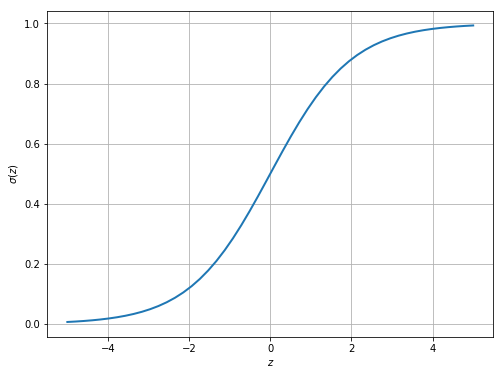

In [3]:
z = np.linspace(-5, 5)

plt.figure(figsize = (8,6))
plt.plot(z, fun_log(z), lw = 2)
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')
plt.grid()
plt.show()

Notamos que:
- Si $z$ es grande, $\sigma(z)=1$.
- Si $-z$ es grande, $\sigma(z)=-1$.
- $\sigma(0)=0.5$.

Finalmente...

**Regresor logístico:** $\hat{y}=\sigma(\boldsymbol{x}_a^T\boldsymbol{\beta})$.

Para manejar todos los datos de entrenamiento, se define la matriz

$$\boldsymbol{X}_a=\left[\boldsymbol{1}_{m\times 1}\quad \boldsymbol{X}\right]=\left[\begin{array}{cc} 1 & {\boldsymbol{x}^1}^T \\ 1 & {\boldsymbol{x}^2}^T \\ \vdots & \vdots \\ 1 & {\boldsymbol{x}^m}^T \end{array}\right]\in\mathbb{R}^{m\times (n+1)}.$$

Así,

$$\hat{\boldsymbol{Y}}=\left[\begin{array}{c} \hat{y}^1 \\ \hat{y}^2 \\ \vdots \\ \hat{y}^m \end{array}\right]=\sigma(\boldsymbol{X}_a\boldsymbol{\beta})$$

In [4]:
def reg_log(B,Xa):
    return fun_log(Xa.dot(B))

## 3. Funcional de costo
Ya que tenemos definida la forma de nuestro modelo clasificador, debemos **entrenar** los parámetros $\boldsymbol{\beta}$ con los ejemplos de entrenamiento.

Es decir, dados  $\left\lbrace(\boldsymbol{x}^1,y^1),(\boldsymbol{x}^2,y^2),\dots,(\boldsymbol{x}^m,y^m)\right\rbrace$, queremos encontrar parámetros $\boldsymbol{\beta}$ tales que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})\approx y^i$ 'lo mejor posible'.

Esto lo plantearemos como un problema de optimización.

**Primera idea:** minimizar error cuadrático $\min_{\boldsymbol{\beta}} \frac{1}{m}\sum_{i=1}^m (\hat{y}^i-y^i)^2$. Problema de optimización *no convexo* (explicar).

**Alternativa:** entonces, se buscó una función de modo que el problema de optimización fuera convexo. Esta es:

$$\min_{\boldsymbol{\beta}} \frac{1}{m}\sum_{i=1}^m -\left(y^i\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)\right)$$

No pretendemos explicar toda esta función. Pero sí podemos ganar algo de intuición de porqué la usamos. Fijemos un $i$ dentro del sumatorio y consideremos el término $-\left(y^i\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)\right)$.

- Si $y^i=1$, entonces lo que queremos minimzar es $-\log(\hat{y}^i)$. Es decir, queremos que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})$ sea lo más grande posible, osea $1=y^i$.
- Si $y^i=0$, entonces lo que queremos minimzar es $-\log(1-\hat{y}^i)$. Es decir, queremos que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})$ sea lo más pequeño posible, osea $0=y^i$.

En cualquier caso, esta función objetivo cumple con lo requerido.

## Ejemplo
El archivo `ex2data1.txt` contiene puntos en el plano $(x,y)$ clasificados con etiquetas $1$ y $0$.

In [5]:
data_file = 'ex2data1.txt'
data = pd.read_csv(data_file, header=None)

X = data.iloc[:,0:2].values
Y = data.iloc[:,2].values

In [6]:
X

array([[ 34.62365962,  78.02469282],
       [ 30.28671077,  43.89499752],
       [ 35.84740877,  72.90219803],
       [ 60.18259939,  86.3085521 ],
       [ 79.03273605,  75.34437644],
       [ 45.08327748,  56.31637178],
       [ 61.10666454,  96.51142588],
       [ 75.02474557,  46.55401354],
       [ 76.0987867 ,  87.42056972],
       [ 84.43281996,  43.53339331],
       [ 95.86155507,  38.22527806],
       [ 75.01365839,  30.60326323],
       [ 82.30705337,  76.4819633 ],
       [ 69.36458876,  97.71869196],
       [ 39.53833914,  76.03681085],
       [ 53.97105215,  89.20735014],
       [ 69.07014406,  52.74046973],
       [ 67.94685548,  46.67857411],
       [ 70.66150955,  92.92713789],
       [ 76.97878373,  47.57596365],
       [ 67.37202755,  42.83843832],
       [ 89.67677575,  65.79936593],
       [ 50.53478829,  48.85581153],
       [ 34.21206098,  44.2095286 ],
       [ 77.92409145,  68.97235999],
       [ 62.27101367,  69.95445795],
       [ 80.19018075,  44.82162893],
 

In [7]:
Y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1])

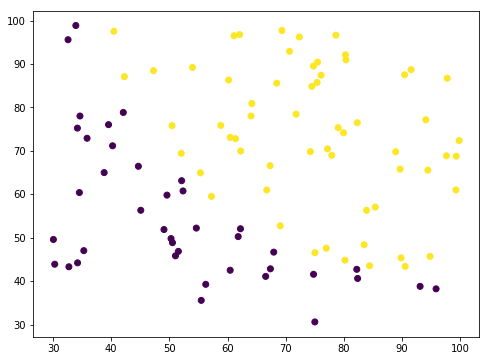

In [8]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

Diseñar un clasificador binario con regresión logística.

El paquete `pyomo_utilities.py` fue actualizado y contiene ahora la función `logreg_clas(X, Y)`.

In [9]:
import pyomo_utilities

In [10]:
B = pyomo_utilities.logreg_clas(X, Y)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.06180143356323242
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Los parámetros del clasificador son entonces:

In [11]:
B

array([-25.16132877,   0.20623168,   0.20147156])

In [12]:
x = np.arange(20, 110, 0.5)
y = np.arange(20, 110, 0.5)
Xm, Ym = np.meshgrid(x, y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

In [13]:
Xa = np.append(np.ones((len(Ymr),1)), Xmr, axis=1)
Xa = np.append(Xa,Ymr,axis=1)

In [14]:
Yg = reg_log(B,Xa)
Z = np.reshape(Yg, (m,n))
Z = np.round(Z)

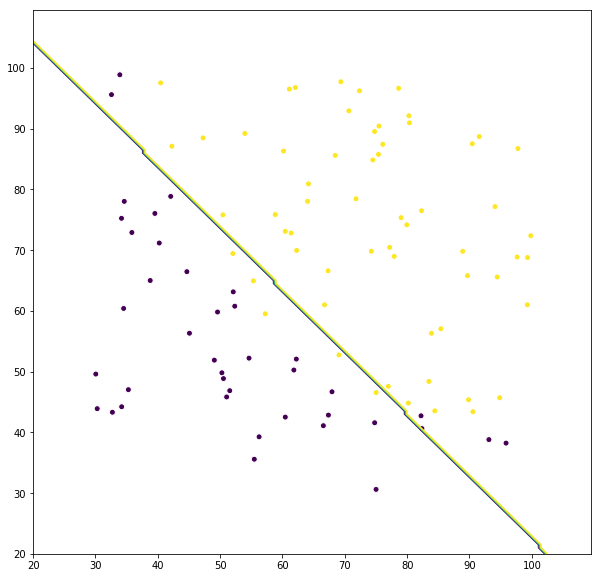

In [15]:
plt.figure(figsize=(10,10))
plt.contour(Xm, Ym, Z)
plt.scatter(X[:, 0],X[:, 1], c=Y, edgecolors='w')
plt.show()

## Actividad
Considere los siguientes datos y diseñe un clasificador binario por regresión logística.

Mostrar el gráfico de la división del clasificador con los puntos de entrenamiento.

Abrir un nuevo notebook, llamado `Tarea8_ApellidoNombre` y subirlo a moodle en el espacio habilitado. Si no terminan esto en clase, tienen hasta el miércoles a las 23:00.

**La tarea de la clase pasada es hasta el miercoles también (se me olvidó habilitar el espacio)**

In [27]:
X = 10*np.random.random((100, 2))
Y = (X[:, 1] > X[:, 0]**2)*1

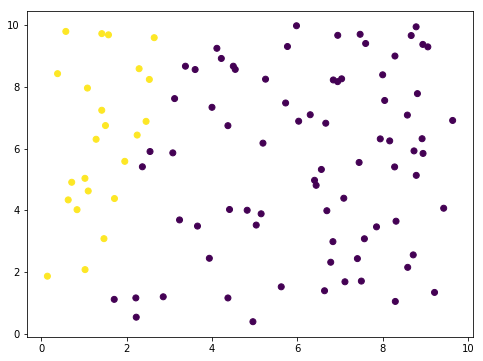

In [28]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

# Importante:
- Proximo martes 21 de noviembre no hay clase.
- Reposición: miércoles 22 de noviembre de 16:00 a 18:00 en el Aula D-110 (clase de repaso).
- Examen el viernes 24 de noviembre.
- Proyecto para el viernes 1 de diciembre.

# Ideas de proyectos:
1. Programación lineal: (con base en el libro Model building in mathematical programming de H. Paul Williams)
 - Planeación de mano de obra.
 - Planeación de producción.
2. Ajuste de curvas:
 - Histórico de temperaturas hasta 2016: ajuste de curvas y predicción de temperaturas de 2017 (comparación con datos reales).
3. Clasificación:
 - Identificación de letras.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>